In [114]:
from copy import copy
import seaborn as sns
import pandas as pd
import math

In [20]:
def take_samples(a, b, n):
    assert a < b and n > 1

    def f(x):
        return x**3 - 3*x**2 - 17*x + 22 + math.sin(x)

    h = (b - a) / (n-1)
    table = []
    for i in range(n):
        xi = a + i*h
        table.append((xi, f(xi)))

    return table

<AxesSubplot: >

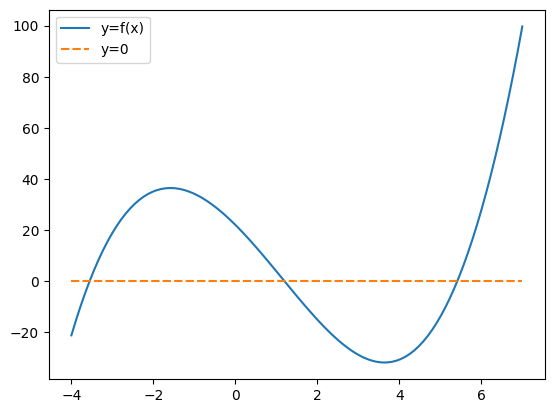

In [44]:
rendering_samples = take_samples(-4, 7, 101)
rendering_dataframe = pd.DataFrame(((b, 0) for a, b in rendering_samples), index=[a for a,b in rendering_samples], columns=['y=f(x)', 'y=0'])
sns.lineplot(rendering_dataframe)

In [54]:
samples = take_samples(4, 5.8, 10)
pd.DataFrame(samples, columns=['xi', 'f(xi)'])

,xi,f(xi)
0,4.0,-30.756802
1,4.2,-29.103576
2,4.4,-26.647602
3,4.6,-23.337691
4,4.8,-19.124165
5,5.0,-13.958924
6,5.2,-7.795455
7,5.4,-0.588764
8,5.6,7.704733
9,5.8,17.127398


In [137]:
def get_finite_differences(samples, util=False):
    table = [[y for x, y in samples]]

    for o in range(len(table[0])-1):
        new_fd = []
        for i in range(len(table[-1]) - 1):
            new_fd.append(table[-1][i+1] - table[-1][i])
        table.append(new_fd)

    if util:
        print('\t{:8}'.format('y'), end='')
        for i in range(1, len(table)):
            print('{:8}'.format('d' + str(i)), end='')
        print()

        for i in range(len(table[0])):
            for j in range(len(table[0]) - i):
                print('{:8.4f}'.format(table[j][i]), end='')
            print()

    return [df[0] for df in table[1:]]


In [138]:
fds = get_finite_differences(samples, util=True)

	y       d1      d2      d3      d4      d5      d6      d7      d8      d9      
-30.7568  1.6532  0.8027  0.0512 -0.0015 -0.0001  0.0001  0.0000 -0.0000  0.0000
-29.1036  2.4560  0.8539  0.0497 -0.0016 -0.0000  0.0001 -0.0000 -0.0000
-26.6476  3.3099  0.9036  0.0481 -0.0016  0.0001  0.0001 -0.0000
-23.3377  4.2135  0.9517  0.0465 -0.0015  0.0001  0.0001
-19.1242  5.1652  0.9982  0.0450 -0.0014  0.0002
-13.9589  6.1635  1.0432  0.0436 -0.0012
 -7.7955  7.2067  1.0868  0.0424
 -0.5888  8.2935  1.1292
  7.7047  9.4227
 17.1274


In [139]:
# ignore negligible finite differences
fds = fds[:6]

In [140]:
print([round(v, 4) for v in fds])

[1.6532, 0.8027, 0.0512, -0.0015, -0.0001, 0.0001]


In [147]:
def get_p_by_fd(fds, x0, y0, h):
    fds = copy(fds)

    def p(x, util=False):
        t = (x - x0) / h
        if util:
            print('t = {:.4f}'.format(t))

        res = y0
        t_product = 1
        factorial = 1

        if util:
            print('P(t) = {:.4f}'.format(res), end=' ')
            t_prints = 't'

        for i, fd in enumerate(fds):
            t_product *= t - i
            factorial *= i + 1

            res += fd * t_product / factorial

            if util:
                print(f'+ {fd:.4f}/{factorial} * {t_prints}', end=' ')
                t_prints += '(t - {:d})'.format(i+1)

        return res
    return p

In [154]:
polynomial = get_p_by_fd(fds, x0=samples[0][0], y0=samples[0][1], h=.2)

In [155]:
polynomial(5, True)

t = 5.0000
P(t) = -30.7568 + 1.6532/1 * t + 0.8027/2 * t(t - 1) + 0.0512/6 * t(t - 1)(t - 2) + -0.0015/24 * t(t - 1)(t - 2)(t - 3) + -0.0001/120 * t(t - 1)(t - 2)(t - 3)(t - 4) + 0.0001/720 * t(t - 1)(t - 2)(t - 3)(t - 4)(t - 5) 

-13.958924274663138

<AxesSubplot: >

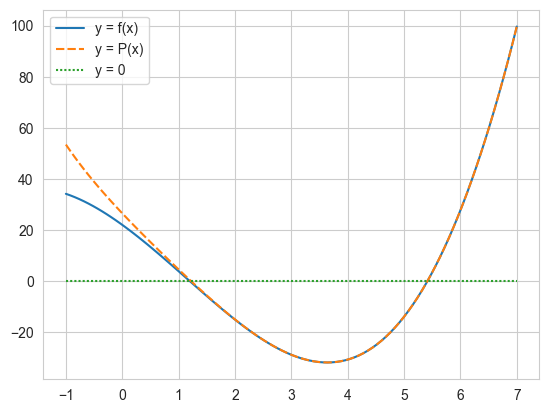

In [169]:
rendering_samples = take_samples(-1, 7, 101)
rendering_dataframe = pd.DataFrame(((b, polynomial(a), 0) for a, b in rendering_samples), index=[a for a,b in rendering_samples], columns=['y = f(x)', 'y = P(x)', 'y = 0'])

sns.lineplot(rendering_dataframe)

In [189]:
eps = 1e-10
root_approximation = 5.5 - polynomial(5.5)/((polynomial(5.5 + eps) - polynomial(5.5))/eps)
print(f'x* = {root_approximation} + eps')

x* = 5.417521315141161 + eps
